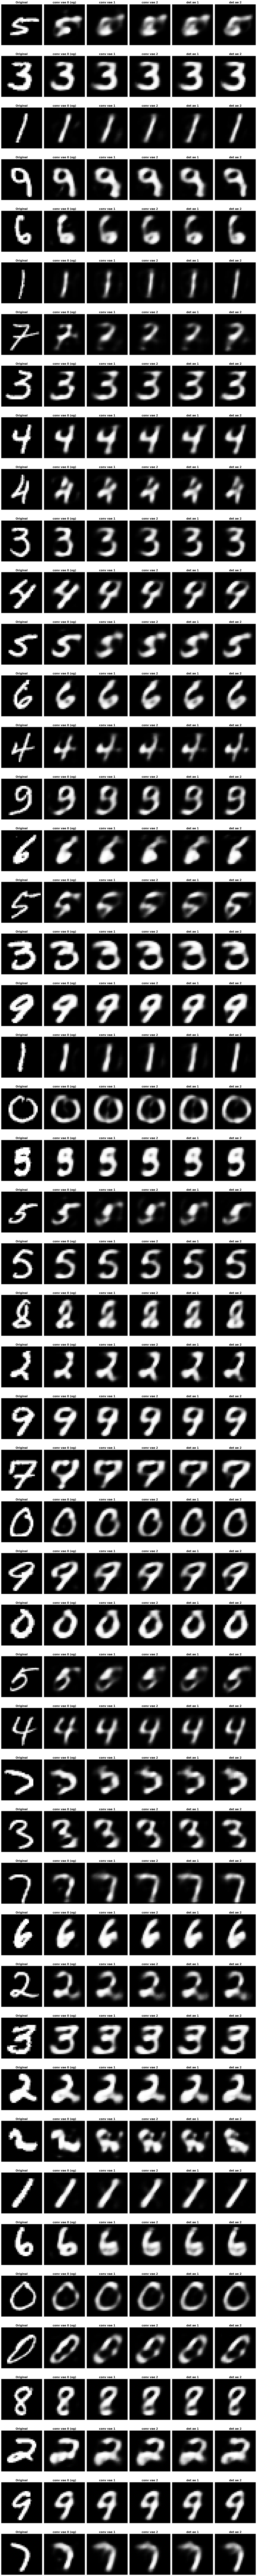

In [1]:
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split

from functions import GetModelImages
import matplotlib.pyplot as plt
import os
import numpy as np

transform = transforms.Compose([transforms.ToTensor()])
whole_dataset  = MNIST('../../Local Data Files/MNIST', transform=transform, download=True);

n_train = int(0.8*len(whole_dataset))
n_val = len(whole_dataset) - n_train
_, val_subset = random_split(whole_dataset, [n_train, n_val], generator=np.random.seed(0))

batch_size = 100
val_loader = DataLoader(dataset=val_subset, batch_size=batch_size, shuffle=False)

num_images = 50  # Number of images to process
model_names = [
    'conv vae 0 (og)', 
    'conv vae 1',
    'conv vae 2',
    'det ae 1',
    'det ae 2'
]

plt.figure(figsize=(20, 4*num_images))
plot_number = 1

# get the original images and the reconstructed images for each model
with GetModelImages(model_names[0], val_loader, num_images) as (original_images, _):
    reconstructions = [GetModelImages(model_path, val_loader, num_images).__enter__()[1] for model_path in model_names]

for image_index in range(num_images): # starts at 0 and ends at 9 for num_images = 10
    print(f'Generating Row {image_index+1}/{num_images}', end='\r')

    # original image
    plt.subplot(num_images, len(model_names) + 1, plot_number)
    plt.imshow(original_images[image_index].view(28, 28), cmap='gray')
    plt.title('Original', fontsize=15, fontweight='bold')
    plt.axis('off')

    # reconstructed images for each model
    for i, reconstruction_images in enumerate(reconstructions, 1):
        plt.subplot(num_images, len(model_names) + 1, plot_number+i)
        plt.imshow(reconstruction_images[image_index].view(28, 28), cmap='gray')
        plt.title(model_names[i-1], fontsize=15, fontweight='bold')
        plt.axis('off')
    
    # reset for next row
    plot_number += (len(model_names) + 1)

plt.tight_layout()
plt.show()